# Imports

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
#Importamos el dataset fashion_mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#Librerias estadisticas
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

#Semilla
seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

# Working with a dataset

##Load and explore the dataset

In [0]:
#
(train_images, train_labels), (test_images, test_labels) =  fashion_mnist.load_data()

In [0]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


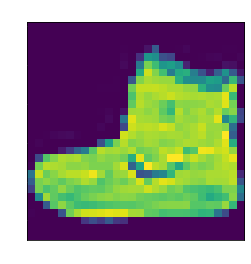

In [0]:
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.axis('on')
plt.show()

## Transform
Convert to grayscale, normalize & standarize

In [0]:
#train_images = (train_images-np.mean(train_images)) / np.std(train_images)
#train_images = tf.squeeze(tf.image.rgb_to_grayscale(train_images / 255.0))
train_images = train_images / 255.0
#test_images = (test_images-np.mean(test_images)) / np.std(test_images)
#test_images = tf.squeeze(tf.image.rgb_to_grayscale(test_images / 255.0))
test_images = test_images / 255.0
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

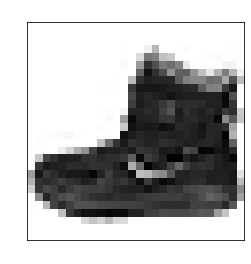

In [0]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])
plt.show()

## Explore final dataset

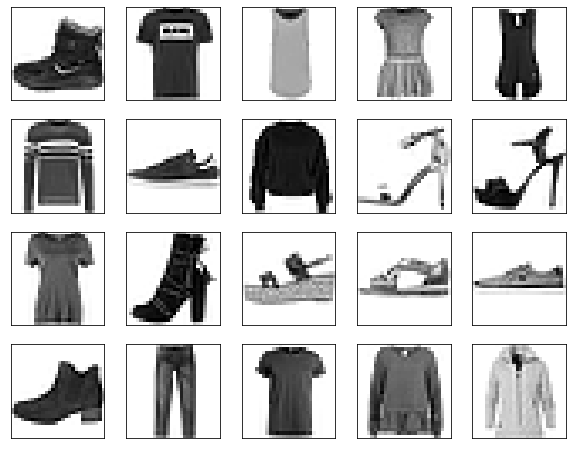

In [0]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='w')
plt.show()

# Build the model

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_images, 
          train_labels, 
          validation_split=0.5,
          epochs=10
          )

Train on 30000 samples, validate on 30000 samples
Epoch 1/10
30000/30000 [==============================] - 10s 328us/sample - loss: 0.3826 - accuracy: 0.8661 - val_loss: 0.3905 - val_accuracy: 0.8636
Epoch 2/10
30000/30000 [==============================] - 10s 324us/sample - loss: 0.3709 - accuracy: 0.8686 - val_loss: 0.3858 - val_accuracy: 0.8644
Epoch 3/10
30000/30000 [==============================] - 10s 317us/sample - loss: 0.3593 - accuracy: 0.8715 - val_loss: 0.4150 - val_accuracy: 0.8512
Epoch 4/10
30000/30000 [==============================] - 10s 322us/sample - loss: 0.3499 - accuracy: 0.8759 - val_loss: 0.3664 - val_accuracy: 0.8709
Epoch 5/10
30000/30000 [==============================] - 10s 325us/sample - loss: 0.3413 - accuracy: 0.8791 - val_loss: 0.3708 - val_accuracy: 0.8677
Epoch 6/10
30000/30000 [==============================] - 10s 325us/sample - loss: 0.3339 - accuracy: 0.8816 - val_loss: 0.4803 - val_accuracy: 0.8255
Epoch 7/10
30000/30000 [====================

# Evaluate

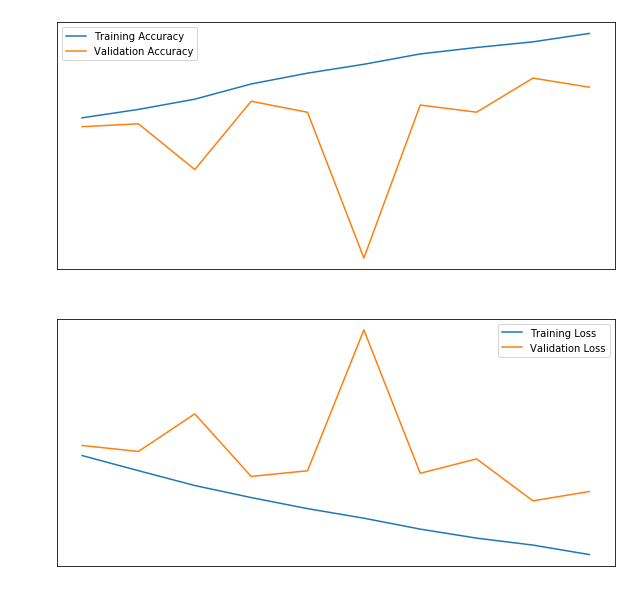

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim(min(plt.ylim()),max(plt.ylim()))
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 0.3822463203191757
Accuracy: 0.8635


# Make predictions

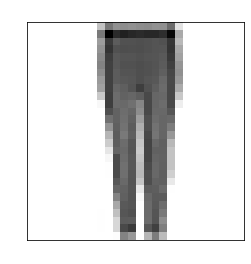


Predicted class is: Trouser


In [0]:
img_index = np.random.randint(test_images.shape[0])
img = test_images[img_index]

predictions = model.predict(tf.expand_dims(img, 0))

plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[test_labels[img_index]])
plt.show()
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])


Predicted class is: Bag


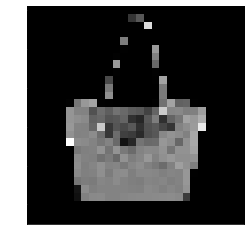

In [0]:
test_image = tf.keras.utils.get_file('bag.jpg','https://altaventas.com/54-thickbox_default/bolsa-guess.jpg')
test_image = Image.open(test_image).resize((28,28)).convert('L')
test_image = np.array(test_image)/255.0
predictions = model.predict(tf.expand_dims(test_image, 0))

plt.imshow(test_image, cmap=plt.cm.binary)
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])